In [164]:
from gerador import gerador_instancias
import pandas as pd
import matplotlib
import time
import random

## Implementação simples dos algoritmos para construção e consulta em uma Segment Tree de soma

Legenda de parâmetros:
a: array para o qual a seg tree está sendo construída // v: índice do vertice atual da árvore // l: limite esquerdo do intervalo do vertice // r: limite direito do intervalo do vertice.

In [165]:
def constroi(a: list, v: int, l: int, r: int) -> None:  
    if v == 1:     
        global st
        st = [0] * (4*len(a)) # tamanho da arvore é O(4n)
    
    if( l == r ):
        st[v] = a[l] # nós folhas (caso base)
        return None
    else:
        m = (l + r) // 2

        constroi(a, v*2, l, m) # calcula o filho da esquerda recursivamente
        constroi(a, v*2+1, m + 1, r) # calcula o filho da direita recursivamente
        
        st[v] = st[v*2] + st[v*2 + 1] # o valor de um vértice interno é soma dos valores dos seus filhos
        
        return None

Legenda de parâmetros:
v: índice do vertice atual da árvore // il: limite esquerdo do intervalo de interesse // ir: limite direito do intervalo de interesse // l: limite esquerdo do intervalo do vertice // r: limite direito do intervalo do vertice.

In [166]:
def consulta(v: int , il: int , ir: int , l: int , r: int ) -> int:
    global st

    if l > r:
        return 0

    if l <= il and ir <= r:
        return st[v]

    im = (il + ir) // 2

    filho_esq = 0
    filho_dir = 0

    if l <= im:
        filho_esq = consulta(v * 2, il, im, l, min(r, im))
    if r > im:
        filho_dir = consulta(v * 2 + 1, im + 1, ir, max(l, im + 1), r)

    return filho_esq + filho_dir

In [167]:
def consulta_iterativo(v: list, l: int, r:int) -> int:
    soma = 0
    
    for i in range(l, min(r + 1, len(v))):
        soma += v[i]
    
    return soma

In [168]:
b = [1, 3, -2, 8,-7]



constroi(b, 1, 0, 4)

print(st)


print(consulta(1, 0, 4, 0, 1))

print(consulta_iterativo(b, 0, 1))


[0, 3, 2, 1, 4, -2, 8, -7, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4
4


In [169]:
instancias = gerador_instancias(500, 5, 1000)
tamanho_col = []
tempo_construcao_col = []
tempo_consulta_col = []  
tempo_consulta_iterativo_col = []

for i in range(len(instancias)):
    
    cur_inst = instancias[i]
    tam_inst = len(cur_inst)
    
    #indices aleatorios pra consulta
    idx_aleat_lower = random.randint(0, tam_inst//2) 
    idx_aleat_upper = random.randint(tam_inst//2 + 1, tam_inst)
    
    # calcula tempo de construção da árvore para instância atual
    start_time = time.time()

    arvore = constroi(cur_inst, 1, 0, (len(cur_inst)-1))

    tempo_construcao = time.time() - start_time


    # calcula tempo de consulta da soma de um intervalo aleatório na árvore da instância atual
    start_time = time.time()

    consulta(1, idx_aleat_lower, idx_aleat_upper, 0, tam_inst)

    tempo_consulta = time.time() - start_time

    
    # calcula tempo de consulta da soma do mesmo intervalo aleatório de maneira iterativa
    start_time = time.time()

    consulta_iterativo(cur_inst, idx_aleat_lower, idx_aleat_upper)

    tempo_consulta_iter = time.time() - start_time




    tamanho_col.append(len(cur_inst))

    tempo_construcao_col.append(tempo_construcao)

    tempo_consulta_col.append(tempo_consulta)

    tempo_consulta_iterativo_col.append(tempo_consulta_iter)

In [170]:
df = pd.DataFrame(columns=["tamanho", "tempo_construcao"])

df["tamanho"] = tamanho_col
df["tempo_construcao"] = tempo_construcao_col
df["tempo_consulta_arvore"] = tempo_consulta_col 
df["tempo_consulta_iter"]  = tempo_consulta_iterativo_col

In [171]:
df

,tamanho,tempo_construcao,tempo_consulta_arvore,tempo_consulta_iter
0,930,0.000434,1.192093e-06,0.000034
1,494,0.000227,4.768372e-07,0.000023
2,117,0.000047,4.768372e-07,0.000003
3,812,0.000357,4.768372e-07,0.000021
4,544,0.000242,2.384186e-07,0.000020
...,...,...,...,...
495,904,0.000395,2.384186e-07,0.000029
496,832,0.000361,4.768372e-07,0.000012
497,26,0.000024,4.768372e-07,0.000002
498,133,0.000046,2.384186e-07,0.000003


<Axes: xlabel='tamanho', ylabel='tempo_construcao'>

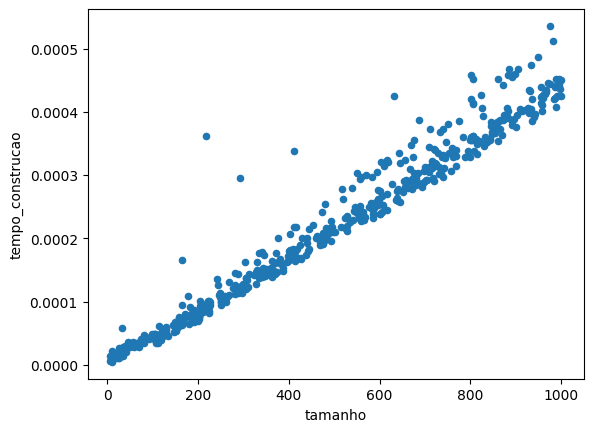

In [172]:
df.plot("tamanho", "tempo_construcao", "scatter")

<Axes: xlabel='tamanho', ylabel='tempo_consulta_arvore'>

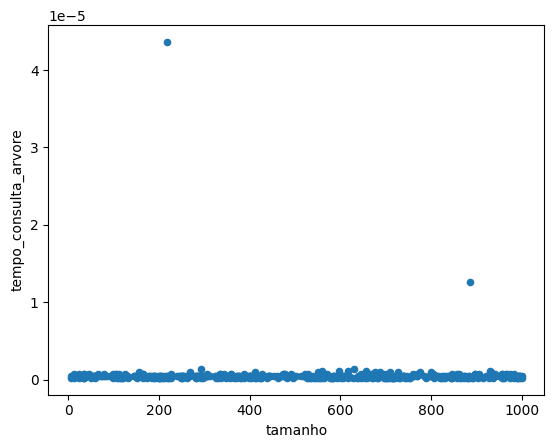

In [173]:
df.plot("tamanho", "tempo_consulta_arvore", "scatter")

<Axes: xlabel='tamanho', ylabel='tempo_consulta_iter'>

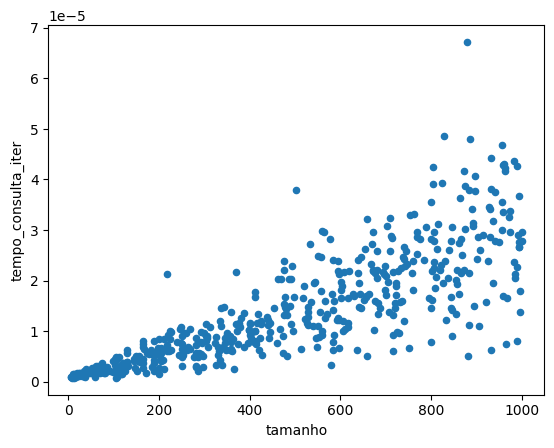

In [174]:
df.plot("tamanho", "tempo_consulta_iter", "scatter")